# Text2Freq

This is a simple script that gets a text file and returns the frequency of words in it.

In [1]:
#Required libraries
import pandas as pd
import glob
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
def text2Array(text):
    #split text to array including all punctuations
    data_array = text.split(' ')
    df = pd.DataFrame(data_array)
    return df

In [3]:
def cleanDF(df):
    #clean the text to remove \n and punctuations
    df[0] = df[0].replace('\n',' ', regex=True)
    df[0] = df[0].str.split(' ')
    df[0] = df[0].explode(ignore_index=True)
    #remove . , " ” “ : ) ( ?
    df[0] = df[0].str.replace(r"[\"\“\”\.\:\(\)\?,]", '',regex=True)
    #remove empty rows
    df[0] = df[0][df[0] != ""]
    #turn words to lower case
    df[0] = df[0].str.lower()
    return df

In [4]:
def df2Freq(df):
    word_counts = df.pivot_table(index=df, aggfunc='size')
    freq_dic = (word_counts.to_dict())
    return (freq_dic)   

In [5]:
#loop through the files in the stories folder
#Apply the above function to the text content of each file
#create empty text file to write the output
#open each file, read the data,apply all of the functions
#write the output in the file craeted

outputList = []
for i in glob.glob("stories/*.txt"):
    file = open(i, "r", encoding="utf-8")
    data = file.read()
    file.close()
    result = df2Freq(cleanDF(text2Array(data)))
    outputList.append(result)  
    
output = open("output.txt", "w")
outputTuple = tuple(outputList)
output.write(json.dumps(outputTuple,ensure_ascii=False))
output.close()
print(outputTuple)


({'a': 4, 'afraid': 1, 'agreed': 1, 'all': 1, 'also': 1, 'always': 1, 'and': 8, 'angry': 1, 'animal': 2, 'animals': 2, 'another': 1, 'answered': 1, 'are': 1, 'as': 2, 'asked': 2, 'attack': 1, 'attacked': 2, 'be': 1, 'because': 1, 'before': 1, 'but': 1, 'by': 1, 'came': 1, 'challenging': 1, 'clever': 1, 'coming': 1, 'considered': 1, 'day': 2, 'decided': 2, 'deep': 1, 'den': 1, 'did': 1, 'dying': 1, 'each': 1, 'ended': 1, 'enemy': 1, 'enraged': 1, 'escape': 1, 'every': 1, 'extremely': 1, 'ferocious': 1, 'foolish': 1, 'forest': 1, 'furiously': 1, 'go': 1, 'greedy': 1, 'group': 1, 'growled': 1, 'he': 2, 'here': 1, 'him': 4, 'himself': 1, 'his': 4, 'i': 1, 'in': 2, 'into': 1, 'it': 1, 'jumped': 1, 'jungle': 1, 'killed': 1, 'late': 1, 'lion': 13, 'lion’s': 1, 'lived': 1, 'managed': 1, 'meet': 1, 'mentioned': 1, 'moral': 1, 'must': 1, 'new': 1, 'of': 4, 'old': 2, 'on': 1, 'once': 1, 'one': 4, 'other': 2, 'others': 1, 'own': 1, 'per': 1, 'prey': 1, 'rabbit': 6, 'rabbits': 1, 'rabbit’s': 1, 're

In [6]:
def topicWordCloud(
    data,
    WCmaxWords=100,
    WCwidth= 3000, WCheight=2000,max_font_size=30, bg="black"):
    wordcloud = WordCloud( width=WCwidth, height=WCheight, max_words=WCmaxWords, background_color=bg, colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate_from_frequencies(data)
    return wordcloud

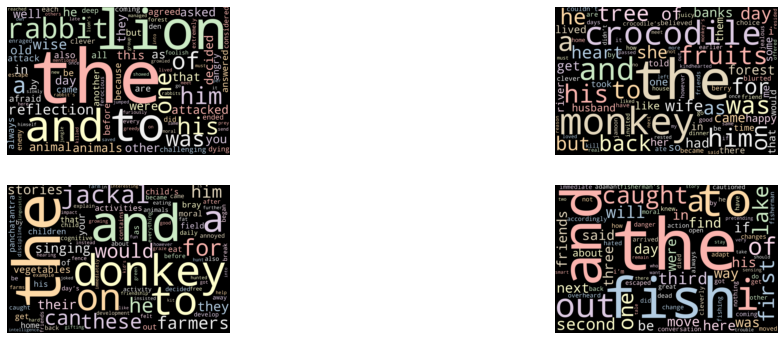

In [7]:
outputTuple = tuple(outputList)

fig = plt.figure(figsize=(18,6))

for i in range(len(outputTuple)):
    ax = fig.add_subplot(2,2,i+1)
    wordcloud = topicWordCloud(outputTuple[i])
    ax.imshow(wordcloud,interpolation='bilinear')
    ax.axis('off')

In [8]:
STOPWORDS.update(['the', 'on', 'and', "a", 'will'])

def filterwords(dataDict):
    for i in list(dataDict.keys()):
        if i in list(STOPWORDS):
            del dataDict[i]
    return dataDict

        

In [9]:
a = filterwords(result)

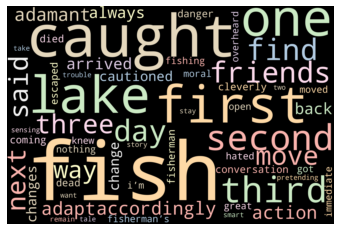

In [10]:
fig = plt.figure()
plt.imshow(topicWordCloud(a),interpolation='bilinear')
plt.axis('off')
plt.show()